<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## Unix v6 Filessystem

**Bloques y Sectores:**

- Sectores: Son las unidades físicas más pequeñas en un disco duro que pueden ser leídas o escritas por el hardware. Generalmente, un sector tiene un tamaño de 512 bytes.

- Bloques: Son unidades lógicas de almacenamiento que el sistema operativo utiliza para gestionar los datos en el disco. Un bloque puede consistir en uno o más sectores. En Unix V6, los bloques suelen ser de 512 bytes, coincidiendo con el tamaño del sector, lo que simplifica la gestión.

**Inodos:**

- Un inodo es una estructura de datos fundamental en el sistema de archivos de Unix V6 que almacena información sobre un archivo o directorio.

- Contiene metadatos como:

    - Permisos de acceso.

    - Propietario y grupo.

    - Tamaño del archivo.

    - Marcas de tiempo (creación, modificación, acceso).

    - Punteros a los bloques de datos donde se almacena el contenido real del archivo.

- Los inodos permiten al sistema de archivos localizar y gestionar eficientemente los archivos sin depender de sus nombres.

**Archivos Grandes:**

- En Unix V6, los inodos tienen un número limitado de punteros directos a bloques de datos, lo que limita el tamaño máximo de un archivo.

- Para soportar archivos de mayor tamaño, se utilizan punteros indirectos:

    - Puntero indirecto simple: Un puntero en el inodo apunta a un bloque que contiene más punteros a bloques de datos adicionales.

    - Esto permite que un archivo pueda crecer más allá del límite impuesto por los punteros directos, extendiendo la capacidad de almacenamiento.



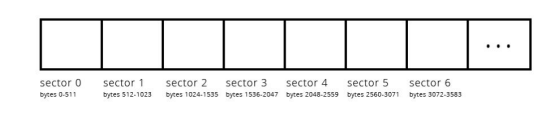

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## Comparación entre RAM y Disco Duro en el Contexto de un Sistema de Archivos

**RAM (Memoria de Acceso Aleatorio):**

- Velocidad: La RAM es extremadamente rápida en comparación con el disco duro. Permite un acceso casi instantáneo a los datos, lo que es crucial para el rendimiento general del sistema.

- Direccionamiento a Nivel de Byte: La RAM es direccionable a nivel de byte, lo que significa que el sistema puede leer o escribir datos en cualquier posición específica de memoria sin restricciones de tamaño mínimo.

- Volatilidad: La RAM es volátil, lo que significa que todos los datos almacenados se pierden cuando el sistema se apaga o reinicia.

**Disco Duro:**

- Lentitud: Los discos duros son mucho más lentos debido a las limitaciones mecánicas y la naturaleza secuencial del acceso a datos.

- Persistencia: Los datos almacenados en un disco duro son persistentes y sobreviven a reinicios y apagados del sistema.

- Acceso por Sectores: El disco duro accede a los datos en unidades llamadas sectores (generalmente de 512 bytes o 4 KB). No es posible leer o escribir un solo byte; se debe acceder al sector completo.

## Implicaciones para el Sistema de Archivos Unix V6

Dado que el disco duro solo permite el acceso a datos en unidades de sectores, el sistema de archivos debe gestionar eficientemente el almacenamiento y la recuperación de datos en estas unidades más grandes.

**1- Bloques y Sectores**

- Sectores:

    - Son las unidades físicas mínimas que el disco duro puede leer o escribir.

    - Debido a su tamaño fijo, el sistema operativo debe trabajar con estas unidades al gestionar datos en el disco.

- Bloques:

    - El sistema de archivos de Unix V6 organiza los datos en bloques, que son unidades lógicas de almacenamiento.

    - Tamaño de Bloque: En Unix V6, los bloques suelen tener el mismo tamaño que los sectores (512 bytes), lo que simplifica la gestión al alinear las estructuras lógicas con las físicas.

    - Gestión Eficiente: Al utilizar bloques, el sistema de archivos puede manejar los datos de manera más eficiente, minimizando la sobrecarga y optimizando el rendimiento.

**2- Inodos**

- Estructura de Datos Fundamental:

    - Un inodo contiene metadatos sobre un archivo o directorio, pero no su nombre (los nombres se almacenan en entradas de directorio que apuntan a inodos).

    - Incluye información como permisos, propietario, tamaño y punteros a los bloques de datos.

- Punteros a Bloques:

    - Los inodos contienen punteros directos e indirectos a los bloques donde se almacenan los datos reales del archivo.

    - Punteros Directos: Apuntan directamente a bloques de datos. Son eficientes para archivos pequeños.

    - Punteros Indirectos: Utilizados para archivos más grandes, donde un puntero indirecto apunta a un bloque que contiene más punteros a bloques de datos.

- Gestión sin Dependencia de Nombres:

    - Al separar los metadatos del nombre del archivo, el sistema de archivos puede gestionar eficientemente operaciones como enlaces duros y movimientos de archivos sin duplicar información.

**3- Manejo de Archivos Grandes**

- Limitaciones de Punteros Directos:

    - Los inodos tienen un número limitado de punteros directos, lo que restringe el tamaño máximo de un archivo si solo se utilizan estos punteros.

- Uso de Punteros Indirectos:

    - Puntero Indirecto Simple: El inodo incluye un puntero que apunta a un bloque de punteros adicionales. Esto amplía significativamente el tamaño máximo del archivo.

    - Escalabilidad: Este enfoque permite que el sistema de archivos maneje archivos mucho más grandes que los que podrían ser soportados solo con punteros directos.

- Impacto en el Rendimiento:

    - Aunque los punteros indirectos añaden un paso adicional en la recuperación de datos (necesidad de leer el bloque de punteros), es un compromiso aceptable para soportar archivos grandes en un medio con acceso limitado a nivel de sector.

Conclusión

El sistema de archivos Unix V6 está diseñado para adaptarse a las características y limitaciones del disco duro:

- Eficiencia en el Acceso a Datos:

    - Al trabajar con bloques que coinciden con los sectores del disco, el sistema minimiza la sobrecarga y optimiza las operaciones de lectura y escritura.

- Gestión de Metadatos con Inodos:

    - Los inodos proporcionan una forma estructurada y eficiente de almacenar información crítica sobre archivos, permitiendo una gestión flexible y robusta.

-  Soporte para Archivos Grandes:

    - El uso de punteros indirectos permite que el sistema de archivos maneje archivos de tamaño considerable sin sacrificar la integridad o la eficiencia.

En resumen, aunque el disco duro es más lento y solo permite el acceso a datos en unidades de sectores, el sistema de archivos Unix V6 utiliza estructuras y técnicas (como bloques, inodos y punteros indirectos) para gestionar eficientemente el almacenamiento y acceso a los datos, superando las limitaciones físicas del medio.

El disco duro es esencialmente un dispositivo de almacenamiento que solo entiende operaciones de lectura y escritura de sectores. Los sectores son unidades de almacenamiento de tamaño fijo (generalmente 512 bytes o 4 KB) y el disco no tiene conocimiento del contenido o significado de los datos almacenados en ellos. Es el sistema operativo, a través del sistema de archivos (FileSystem), el que da sentido a esos bytes, organizándolos en estructuras lógicas como archivos, directorios, inodos, etc.

La interfaz básica que proporciona el hardware del disco duro puede representarse con funciones como:

void readsector(size_t sector, void* buff);

void writeSector(size_t sector, const void* buff);

Estas funciones permiten leer y escribir sectores específicos en el disco, pero no ofrecen ninguna abstracción sobre cómo se organizan los datos más allá de esa operación básica.

## **Cómo el Sistema de Archivos Interactúa con el Disco Duro**

El sistema de archivos se encarga de traducir las operaciones de alto nivel (como crear, leer o escribir un archivo) en operaciones de bajo nivel que interactúan directamente con los sectores del disco. A continuación, explicaré cómo se logra esto en el contexto del sistema de archivos de Unix V6.

1- Organización en Bloques

- Bloques Lógicos:

    - El sistema de archivos agrupa sectores en unidades lógicas llamadas bloques.

    - En Unix V6, un bloque suele ser de 512 bytes, coincidiendo con el tamaño del sector físico, lo que simplifica el mapeo entre bloques y sectores.

- Mapeo de Bloques a Sectores:

    - Cada bloque lógico se asigna directamente a un sector físico en el disco.

    - Esto permite que las operaciones de lectura y escritura de bloques se traduzcan directamente en operaciones de lectura y escritura de sectores.

2- Estructuras del Sistema de Archivos

- Superbloque:

    - Ubicado al comienzo del sistema de archivos, contiene información sobre el sistema de archivos en sí, como el tamaño total, el número de inodos y mapas de bits para seguimiento de bloques libres e inodos libres.

- Inodos:

    - Los inodos son estructuras que almacenan metadatos sobre archivos y directorios.

    - Incluyen información como permisos, propietario, tamaño, y punteros a los bloques de datos.

    - Cada inodo tiene un número único que lo identifica en el sistema de archivos.

- Datos de Archivos:

    - Los datos reales de los archivos se almacenan en bloques asignados a ese archivo.
Los punteros en el inodo indican qué bloques pertenecen al archivo.
3. Operaciones de Lectura y Escritura
Lectura de un Archivo:

Búsqueda del Inodo:
Se accede al directorio que contiene el archivo para obtener el número de inodo asociado al nombre del archivo.
Los directorios en Unix son archivos especiales que contienen pares de nombres de archivos y números de inodo.
Lectura del Inodo:
Se utiliza readsector para leer los sectores donde está almacenado el inodo.
Acceso a los Bloques de Datos:
Los punteros en el inodo se utilizan para determinar qué bloques contienen los datos del archivo.
Se utilizan readsector para leer los sectores correspondientes a esos bloques.
Escritura en un Archivo:

El proceso es similar a la lectura, pero utilizando writeSector para escribir datos en los bloques asignados.
4. Manejo de Punteros Directos e Indirectos
Punteros Directos:

El inodo contiene un número limitado de punteros directos que apuntan directamente a bloques de datos.
Ideal para archivos pequeños.
Punteros Indirectos:

Para archivos más grandes, el inodo utiliza punteros indirectos.
Un puntero indirecto apunta a un bloque que contiene más punteros a bloques de datos.
Esto permite manejar archivos que exceden el tamaño que se puede direccionar con los punteros directos.
5. Ejemplo de Acceso a Datos
Lectura de un Archivo Paso a Paso:
Encontrar el Inodo:
El sistema de archivos busca el nombre del archivo en el directorio y obtiene el número de inodo.
Leer el Inodo:
Se calcula qué sector contiene el inodo y se lee con readsector.
Acceder a los Datos:
Se utilizan los punteros en el inodo para localizar los bloques de datos.
Los bloques de datos se leen sector por sector usando readsector.
6. Administración del Espacio en Disco
Mapas de Bits:

El sistema de archivos mantiene mapas de bits para llevar registro de los bloques y inodos libres.
Al crear o eliminar archivos, se actualizan estos mapas de bits para reflejar el estado actual del sistema de archivos.
Asignación de Bloques:

Cuando se necesita espacio para un nuevo archivo o para expandir uno existente, el sistema de archivos busca bloques libres utilizando el mapa de bits y los asigna al inodo correspondiente.
7. Caché y Rendimiento
Buffer Cache:

Para mejorar el rendimiento, el sistema operativo utiliza una caché en memoria RAM para almacenar temporalmente los bloques más utilizados.
Esto reduce el número de accesos al disco, que son operaciones lentas.
Sincronización:

Los datos en caché se escriben al disco en intervalos regulares o cuando se cierra un archivo.
Esto asegura que los datos persistentes en el disco estén actualizados.
Resumiendo la Interacción
Nivel de Hardware:

El disco duro solo proporciona operaciones básicas para leer y escribir sectores.
No tiene conocimiento de estructuras lógicas como archivos o directorios.
Sistema Operativo y Sistema de Archivos:

El sistema operativo implementa el sistema de archivos que define cómo se organizan los datos en los sectores.
Utiliza funciones de bajo nivel (readsector, writeSector) para interactuar con el disco.
Estructuras Lógicas:

Bloques: Unidades lógicas que pueden corresponder directamente a sectores.
Inodos: Contienen metadatos y punteros a los bloques de datos.
Directorios: Mapas de nombres de archivos a números de inodo.
Conclusión
El disco duro, siendo un dispositivo que solo entiende sectores, depende del sistema operativo y del sistema de archivos para interpretar y organizar los datos de manera significativa. El sistema de archivos Unix V6 logra esto utilizando estructuras como bloques e inodos, y manejando punteros directos e indirectos para acceder a los datos almacenados en los sectores del disco.

La interfaz básica que proporcionas (readsector, writeSector) es esencial para este proceso, ya que permite al sistema de archivos realizar las operaciones de lectura y escritura necesarias para gestionar los archivos y directorios de manera eficiente y persistente.

Si tienes más preguntas o necesitas profundizar en algún aspecto específico, como el manejo de directorios, la estructura interna de los inodos, o cómo se implementan los punteros indirectos en detalle, no dudes en preguntar y con gusto ampliaré la información.
